In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# original image 
original_img = cv2.imread("Photos/IMG_2304.jpg", cv2.IMREAD_COLOR)
gray_picture = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)#make picture gray
faces = face_cascade.detectMultiScale(gray_picture, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(original_img,(x,y),(x+w,y+h),(255,255,0),5)
    
    gray_face = gray_picture[y:y+h, x:x+w] # cut the gray face frame out
    face = original_img[y:y+h, x:x+w] # cut the face frame out
    eyes = eye_cascade.detectMultiScale(gray_face, 1.1, 40) # (ex,ey,ew,eh)

In [17]:
left, right = eyes[np.argsort(eyes[:, 0])]

left, right

(array([374, 462, 316, 316], dtype=int32),
 array([898, 448, 319, 319], dtype=int32))

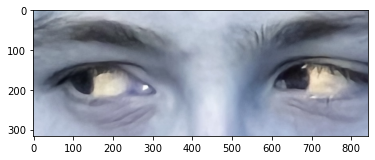

In [34]:
plt.imshow(original_img[y+min(left[1], right[1]): y+min(left[1], right[1])+min(left[3], right[3]), x+left[0]:x+right[0]+right[2]])